In [9]:
import pandas as pd

# Загружаем рейтинги
ratings = pd.read_csv(
    "../data/u.data",
    sep="\t",
    names=["userId", "movieId", "rating", "timestamp"]
)

# Загружаем фильмы
movies = pd.read_csv(
    "../data/u.item",
    sep="|",
    encoding="latin-1",
    names=[
        "movieId", "title", "release_date", "video_release_date",
        "imdb_url", "unknown", "Action", "Adventure", "Animation",
        "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
        "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
        "Thriller", "War", "Western"
    ]
)

print(ratings.head())
print(movies.head())


   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596
   movieId              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995                 NaN   
4        5     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://

Топ-10 популярных фильмов:
                             title  rating
49                Star Wars (1977)     583
257                 Contact (1997)     509
99                    Fargo (1996)     508
180      Return of the Jedi (1983)     507
293               Liar Liar (1997)     485
285    English Patient, The (1996)     481
287                  Scream (1996)     478
0                 Toy Story (1995)     452
299           Air Force One (1997)     431
120  Independence Day (ID4) (1996)     429


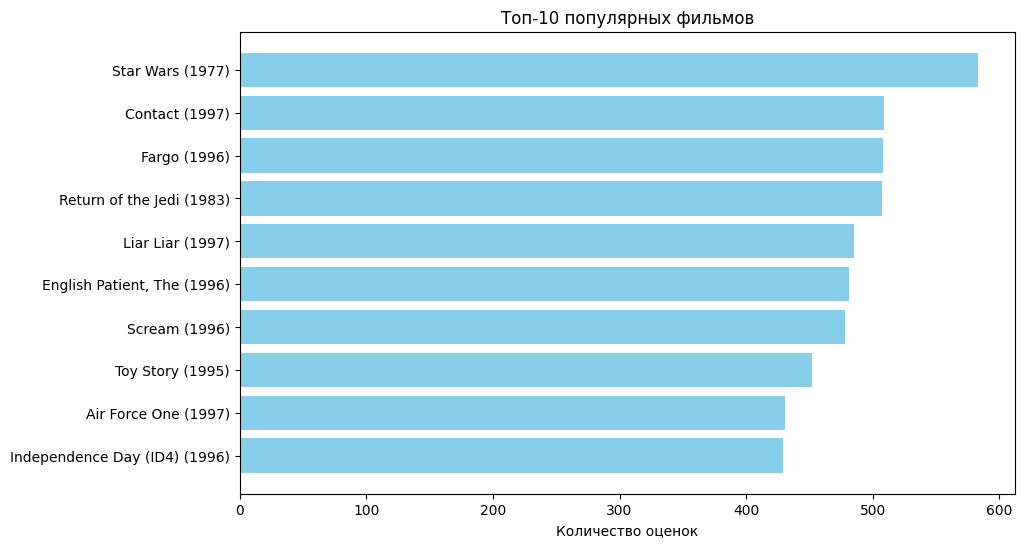

In [10]:
import matplotlib.pyplot as plt

# Считаем количество оценок для каждого фильма
popular_movies = ratings.groupby("movieId")["rating"].count().reset_index()
popular_movies = popular_movies.merge(movies[["movieId", "title"]], on="movieId")
popular_movies = popular_movies.sort_values("rating", ascending=False).head(10)

print("Топ-10 популярных фильмов:")
print(popular_movies[["title", "rating"]])

# Визуализация
plt.figure(figsize=(10,6))
plt.barh(popular_movies["title"], popular_movies["rating"], color="skyblue")
plt.xlabel("Количество оценок")
plt.title("Топ-10 популярных фильмов")
plt.gca().invert_yaxis()
plt.show()



In [11]:
# Средние оценки (только если у фильма > 100 оценок)
movie_mean_ratings = ratings.groupby("movieId")["rating"].mean()
movie_counts = ratings.groupby("movieId")["rating"].count()

movie_stats = pd.DataFrame({
    "mean_rating": movie_mean_ratings,
    "num_ratings": movie_counts
}).reset_index()

# Фильтруем только фильмы с достаточным количеством оценок
movie_stats = movie_stats[movie_stats["num_ratings"] > 100]

# Добавляем названия фильмов
movie_stats = movie_stats.merge(movies[["movieId", "title"]], on="movieId")

# Сортируем по среднему рейтингу
top_rated = movie_stats.sort_values("mean_rating", ascending=False).head(10)

print("Топ-10 фильмов по среднему рейтингу:")
print(top_rated[["title", "mean_rating", "num_ratings"]])


Топ-10 фильмов по среднему рейтингу:
                                title  mean_rating  num_ratings
231             Close Shave, A (1995)     4.491071          112
202           Schindler's List (1993)     4.466443          298
91         Wrong Trousers, The (1993)     4.466102          118
261                 Casablanca (1942)     4.456790          243
29   Shawshank Redemption, The (1994)     4.445230          283
292                Rear Window (1954)     4.387560          209
7          Usual Suspects, The (1995)     4.385768          267
22                   Star Wars (1977)     4.358491          583
99                12 Angry Men (1957)     4.344000          125
72                Citizen Kane (1941)     4.292929          198


In [13]:
# Допустим, хотим рекомендации для пользователя с id=1
user_id = 1

# Фильмы, которые этот пользователь уже оценил
user_movies = ratings[ratings["userId"] == user_id]["movieId"].tolist()

# Берём топ фильмов по среднему рейтингу (только популярные, > 100 оценок)
movie_mean_ratings = ratings.groupby("movieId")["rating"].mean()
movie_counts = ratings.groupby("movieId")["rating"].count()

movie_stats = pd.DataFrame({
    "mean_rating": movie_mean_ratings,
    "num_ratings": movie_counts
}).reset_index()

movie_stats = movie_stats[movie_stats["num_ratings"] > 100]

# Добавляем названия
movie_stats = movie_stats.merge(movies[["movieId", "title"]], on="movieId")

# Исключаем те фильмы, которые юзер уже смотрел
recommendations = movie_stats[~movie_stats["movieId"].isin(user_movies)]

# Берём топ-10
recommendations = recommendations.sort_values("mean_rating", ascending=False).head(10)

print(f"Рекомендации для пользователя {user_id}:")
print(recommendations[["title", "mean_rating", "num_ratings"]])


Рекомендации для пользователя 1:
                                                 title  mean_rating  \
231                              Close Shave, A (1995)     4.491071   
202                            Schindler's List (1993)     4.466443   
261                                  Casablanca (1942)     4.456790   
292                                 Rear Window (1954)     4.387560   
238                       To Kill a Mockingbird (1962)     4.292237   
219             One Flew Over the Cuckoo's Nest (1975)     4.291667   
259                          North by Northwest (1959)     4.284916   
182                              Secrets & Lies (1996)     4.265432   
298                   Manchurian Candidate, The (1962)     4.259542   
254  Dr. Strangelove or: How I Learned to Stop Worr...     4.252577   

     num_ratings  
231          112  
202          298  
261          243  
292          209  
238          219  
219          264  
259          179  
182          162  
298          1

Выбрали пользователя (например, user_id = 1).

Смотрим, какие фильмы он уже оценил.

Берём фильмы, которые он ещё не видел.

Сортируем по среднему рейтингу и оставляем только популярные.

Получаем топ-10 рекомендаций.

In [20]:
movies[movies["title"].str.contains("Star Wars", case=False)].head()


,movieId,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
49,50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0


In [21]:
target_movie = "Star Wars"


In [22]:
search_title = "Star Wars"
found_movies = movies[movies["title"].str.contains(search_title, case=False, regex=False)]

if found_movies.empty:
    print(f"Фильм '{search_title}' не найден!")
else:
    target_id = found_movies.iloc[0]["movieId"]
    target_title = found_movies.iloc[0]["title"]
    print(f"Будем искать похожие на: {target_title}")


Будем искать похожие на: Star Wars (1977)


In [26]:
# Создаём матрицу: строки — пользователи, столбцы — фильмы
movie_ratings_matrix = ratings.pivot_table(
    index="userId", 
    columns="movieId", 
    values="rating"
)

# Поиск фильма
search_title = "Star Wars"
found_movies = movies[movies["title"].str.contains(search_title, case=False, regex=False)]

if found_movies.empty:
    print(f"Фильм '{search_title}' не найден в базе!")
else:
    target_id = found_movies.iloc[0]["movieId"]
    target_title = found_movies.iloc[0]["title"]

    # Вектор оценок для фильма
    target_ratings = movie_ratings_matrix[target_id]

    # Считаем корреляцию с другими фильмами
    similar_movies = movie_ratings_matrix.corrwith(target_ratings)

    # Преобразуем в датафрейм
    similar_movies = pd.DataFrame(similar_movies, columns=["correlation"])
    similar_movies = similar_movies.dropna().reset_index()

    # Добавляем количество общих зрителей
    common_counts = ratings.groupby("movieId")["userId"].count().reset_index()
    common_counts.rename(columns={"userId": "num_ratings"}, inplace=True)
    similar_movies = similar_movies.merge(common_counts, on="movieId")

    # Добавляем названия фильмов
    similar_movies = similar_movies.merge(movies[["movieId", "title"]], on="movieId")

    # Фильтруем только фильмы с >= 50 оценками
    similar_movies = similar_movies[similar_movies["num_ratings"] >= 50]

    # Убираем сам фильм
    similar_movies = similar_movies[similar_movies["movieId"] != target_id]

    # Сортируем по корреляции
    similar_movies = similar_movies.sort_values("correlation", ascending=False).head(10)

    print(f"Фильмы, похожие на '{target_title}':")
    print(similar_movies[["title", "correlation", "num_ratings"]])


Фильмы, похожие на 'Star Wars (1977)':
                                                 title  correlation  \
171                    Empire Strikes Back, The (1980)     0.747981   
180                          Return of the Jedi (1983)     0.672556   
173                     Raiders of the Lost Ark (1981)     0.536117   
605                                       Giant (1956)     0.488093   
866                       Life Less Ordinary, A (1997)     0.411638   
247  Austin Powers: International Man of Mystery (1...     0.377433   
193                                  Sting, The (1973)     0.367538   
209          Indiana Jones and the Last Crusade (1989)     0.350107   
400                                   Pinocchio (1940)     0.347868   
538     Things to Do in Denver when You're Dead (1995)     0.337714   

     num_ratings  
171          367  
180          507  
173          420  
605           51  
866           53  
247          130  
193          241  
209          331  
400     

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


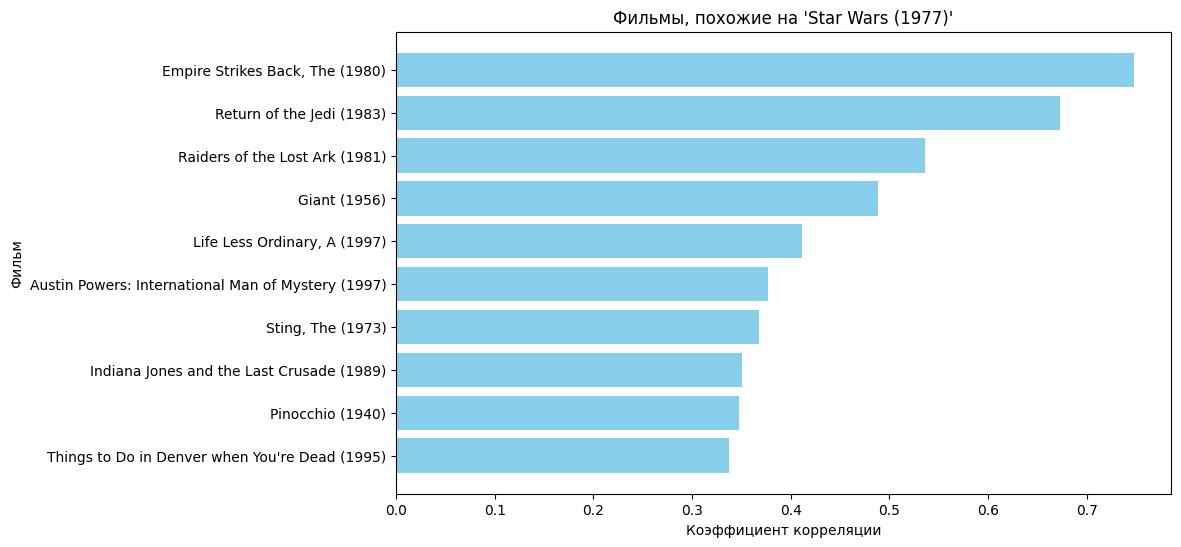

In [27]:
import matplotlib.pyplot as plt

# Визуализация топ-10 похожих фильмов
plt.figure(figsize=(10,6))
plt.barh(similar_movies["title"], similar_movies["correlation"], color="skyblue")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("Фильм")
plt.title(f"Фильмы, похожие на '{target_title}'")
plt.gca().invert_yaxis()  # чтобы самый похожий был сверху
plt.show()


In [28]:
# Выбираем пользователя
user_id = 1

# Фильмы, которые он уже оценил
user_ratings = ratings[ratings["userId"] == user_id].merge(movies, on="movieId")

print("Фильмы, которые пользователь уже оценил:")
print(user_ratings[["title", "rating"]].head(10))

# Берём один из фильмов, который он оценил высоко
top_movie = user_ratings.sort_values("rating", ascending=False).iloc[0]
top_movie_title = top_movie["title"]
top_movie_id = top_movie["movieId"]

print(f"\nБудем искать рекомендации на основе фильма: {top_movie_title}")

# Находим похожие фильмы
top_movie_ratings = movie_ratings_matrix[top_movie_id]
similar_movies_user = movie_ratings_matrix.corrwith(top_movie_ratings)

similar_movies_user = (
    pd.DataFrame(similar_movies_user, columns=["correlation"])
    .join(movies.set_index("movieId"), on="movieId")
    .dropna()
    .sort_values("correlation", ascending=False)
)

# Убираем фильмы, которые пользователь уже смотрел
similar_movies_user = similar_movies_user[~similar_movies_user["title"].isin(user_ratings["title"])]

print("\nРекомендации пользователю:")
print(similar_movies_user[["title", "correlation"]].head(10))


Фильмы, которые пользователь уже оценил:
                              title  rating
0        Three Colors: White (1994)       4
1           Grand Day Out, A (1992)       3
2                  Desperado (1995)       4
3        Glengarry Glen Ross (1992)       4
4         Angels and Insects (1995)       4
5              Groundhog Day (1993)       5
6               Delicatessen (1991)       5
7  Hunt for Red October, The (1990)       4
8              Dirty Dancing (1987)       2
9                  Rock, The (1996)       3

Будем искать рекомендации на основе фильма: Cinema Paradiso (1988)

Рекомендации пользователю:
Empty DataFrame
Columns: [title, correlation]
Index: []


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
